<h1 style="color:orange">EXERCISE CLASS 3 (Part 2/3)</h1>

# EXERCISE 2
A study was performed by ComputerTek Co to determine the time series of order processing durations. Data in the file "dataset_ese3_es2.csv"  refer to the period 1995, July – 1997, October. Each datum represents the time (in days) to ship the order.

Design a 95% **prediction interval** for future observations.

> ### Suggestion
> Remind that if: 
> $$X \sim N(\mu, \sigma^2) $$
> then:
> $$ \frac{X - \mu}{s} \sim t_{n-1}$$

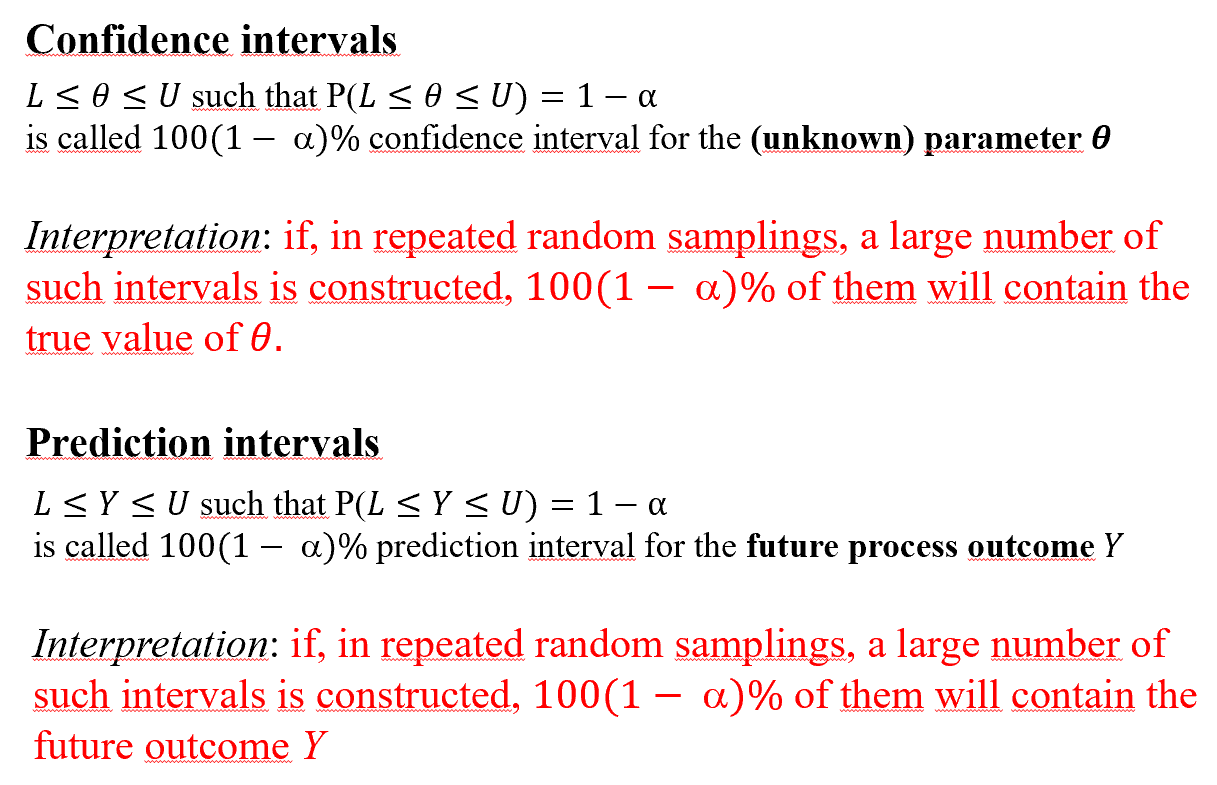

In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

# Import the dataset
data = pd.read_csv('dataset_ese3_es2.csv')

data.head()

,Ex2
0,29
1,21
2,17
3,9
4,49


> We need a model of process output to make predictions. 
> Which kind of model? **Time series** model or **distributional** model.
>
> We can verify if the process is random by using :
> 1. time series plot (qualitative)
> 2. ACF/PCAF (qualitative)
> 3. runs test (quantitative)
> 4. Bartlett’s test (quantitative)
> 5. LBQ test (quantitative)

> 1. Time series plot

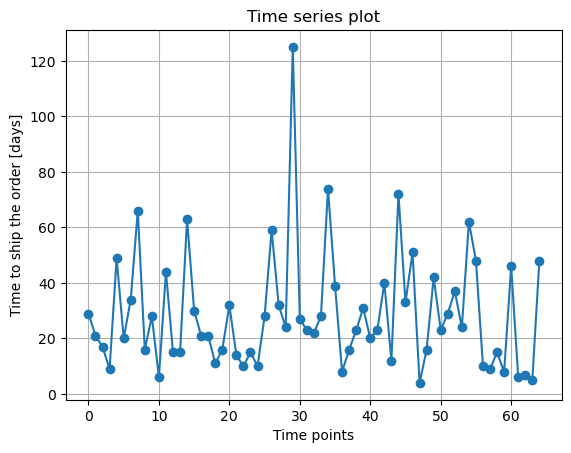

In [2]:
# Time series plot
plt.plot(data, 'o-')
plt.xlabel('Time points')
plt.ylabel('Time to ship the order [days]')
plt.title('Time series plot')
plt.grid()
plt.show()

> 2. Runs test


In [3]:
# Import the necessary libraries for the runs test
from statsmodels.sandbox.stats.runs import runstest_1samp

stat_runs, pval_runs = runstest_1samp(data['Ex2'], correction=False)
print('Runs test statistic = {:.3f}'.format(stat_runs))
print('Runs test p-value = {:.3f}'.format(pval_runs))

Runs test statistic = 0.325
Runs test p-value = 0.745


> 3. ACF/PACF


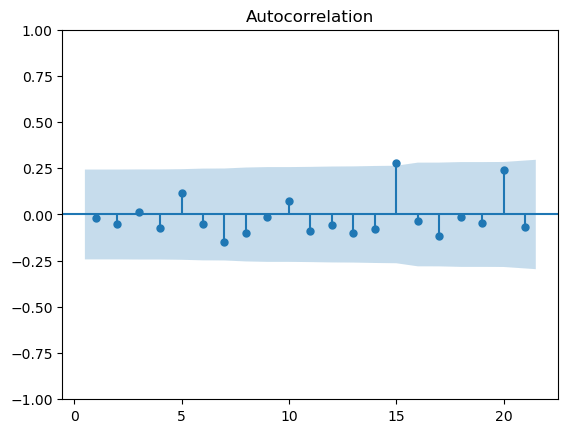

In [4]:
# Plot the acf using the statsmodels library
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(data['Ex2'], lags = int(len(data)/3), zero=False)
plt.show()


> 4. Histogram and Boxplot

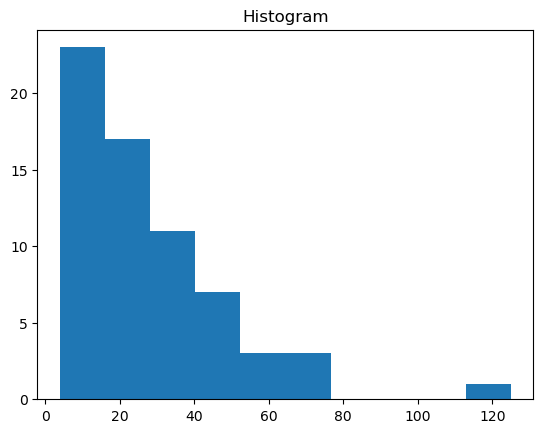

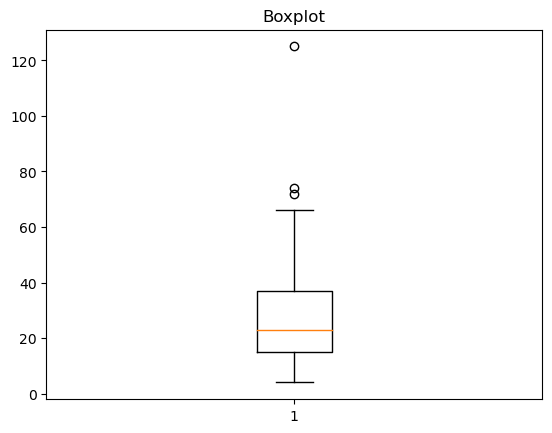

In [5]:
plt.hist(data)
plt.title('Histogram')
plt.show()

plt.boxplot(data)
plt.title('Boxplot')
plt.show()

> Let's check normality 

Statistic = 0.844, p-val = 0.000
Reject H0


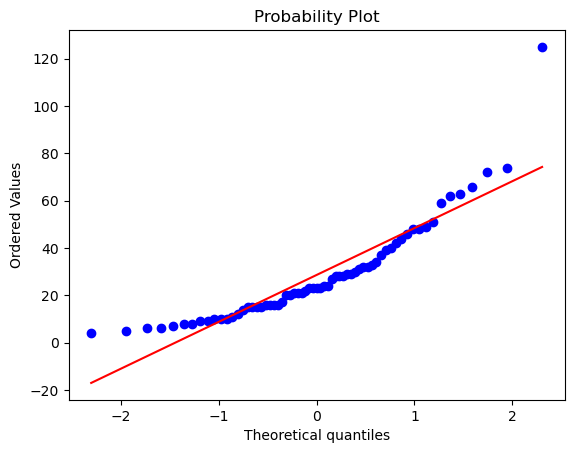

In [6]:
#Normality test
#Shapiro-Wilk test
import matplotlib.pyplot as plt

stat_shapiro, p_shapiro = stats.shapiro(data)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')


# Plot the qqplot
stats.probplot(data['Ex2'], dist="norm", plot=plt)
plt.show()



> How much is this result influenced by the outlier? We can try to remove the outlier and check for normality again. 

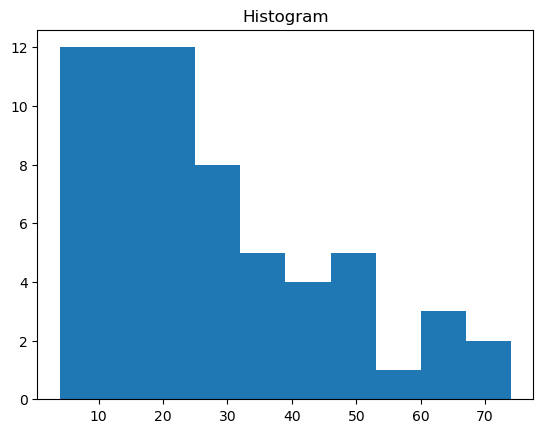

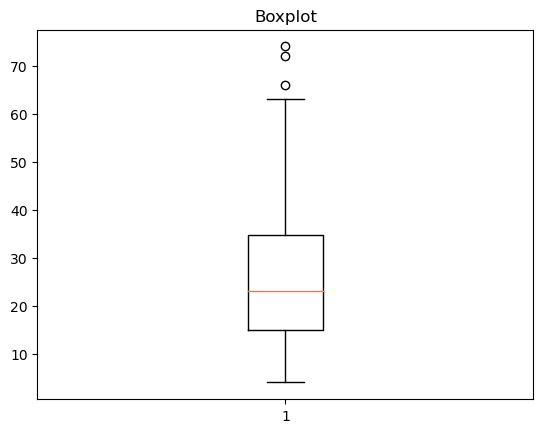

Statistic = 0.914, p-val = 0.000
Reject H0


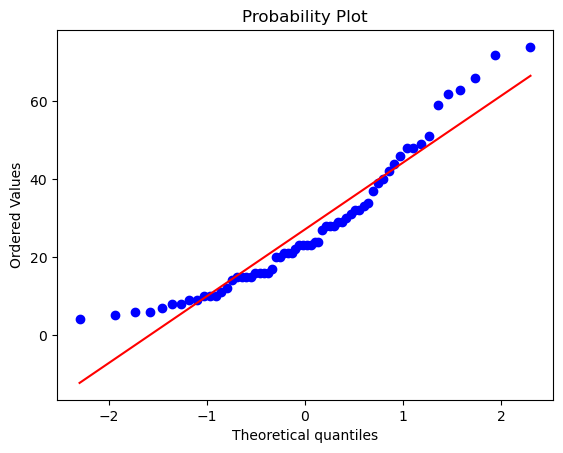

In [7]:
# Remove outlier (point 30) and check normality
data_out = data.drop(index=29)

plt.hist(data_out)
plt.title('Histogram')
plt.show()

plt.boxplot(data_out)
plt.title('Boxplot')
plt.show()

#Normality test
#Shapiro-Wilk test
from scipy.stats import shapiro
stat_shapiro_out, p_shapiro_out = shapiro(data_out)
print('Statistic = %.3f, p-val = %.3f' % (stat_shapiro_out, p_shapiro_out))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')

# Plot the qqplot
stats.probplot(data_out['Ex2'], dist="norm", plot=plt)
plt.show()



> Even after removing the outlier, normality is still violated. 
>
>Try with the Box-Cox transformation. 

### Remind:

$y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$

$y = ln(x)$, for $\lambda = 0$


Lambda = 0.100


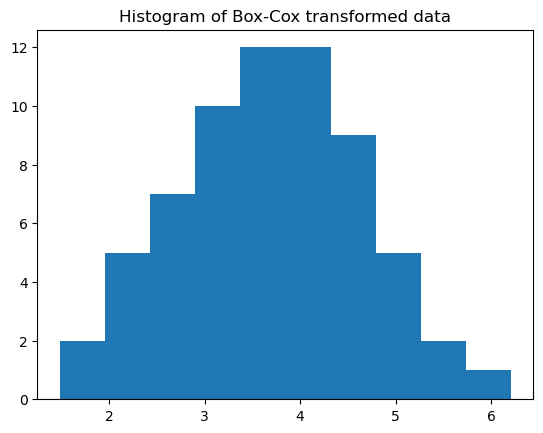

In [8]:
#Box-Cox transformation
[data_norm, lmbda]=stats.boxcox(data['Ex2'])

print('Lambda = %.3f' % lmbda)

plt.hist(data_norm)
plt.title('Histogram of Box-Cox transformed data')
plt.show()


Statistics=0.992, p=0.959
Fail to reject H0


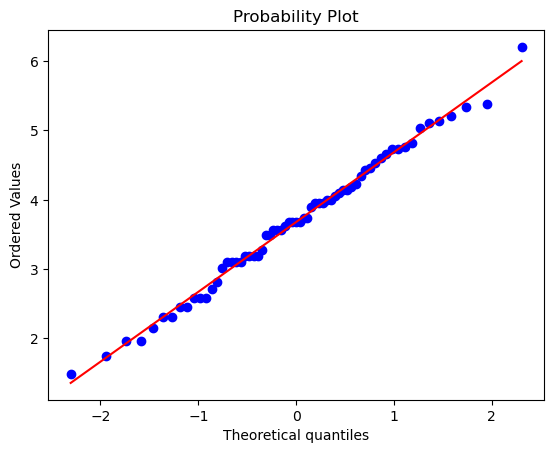

In [9]:
stat, p_shapiro = stats.shapiro(data_norm)
print('Statistics=%.3f, p=%.3f' % (stat, p_shapiro))
# interpret
alpha = 0.05
if p_shapiro > alpha:
    print('Fail to reject H0')
else:    
    print('Reject H0')

# Plot the qqplot
stats.probplot(data_norm, dist="norm", plot=plt)
plt.show()


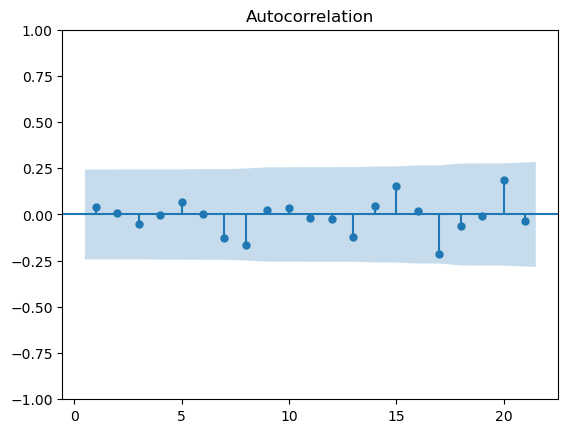

In [10]:
# Plot the acf using the statsmodels library

sgt.plot_acf(data_norm, lags = int(len(data_norm)/3), zero=False)
plt.show()


No graphical evidence of auto-correlation from the sample acf plot.
We can verify it with quantitative tests, e.g.:
- Bartlett's test
- LBQ test

> On transformed data
> 
> **Bartlett's test for a specific lag $k$**
>
> $ H_{0} : \rho_{k}=0 $
>
> $ H_{1} : \rho_{k}\neq{0} $
>
> $ \rho_{k} $: true autocorr at lag $k$ 
>
> $ r_{k} $: sample autocorr at lag $k$ 
>
> Rejection region $ |r_{k}| \gt \frac{z_{\alpha/2}}{\sqrt{n}} $

In [11]:
from statsmodels.tsa.stattools import acf

n = len(data_norm)

#autocorrelation function
[acf_values, lbq, _] = acf(data_norm, nlags = int(np.sqrt(n)), qstat=True, fft = False)


In [12]:

#Bartlett's test at lag 1
lag_test = 1
rk = acf_values[lag_test]
print('Test statistic rk = %f' % rk)
print('Rejection region starts at %f' % (1.96/np.sqrt(n)))

if rk>1.96/np.sqrt(n):
    print('The null hypothesis is rejected')
else: print('The null hypothesis is accepted')

Test statistic rk = 0.040639
Rejection region starts at 0.243108
The null hypothesis is accepted


> **LBQ test**
> 
> $ H_{0} : \rho_{k}=0, k=1,...,L $
>
> $ H_{1} : \exists k \in [1,L]$ such that $\rho_{k}\neq{0} $
>
> LBQ test statistic: 
> $$ LBQ = n(n+2) \sum_{k=1}^L { \frac{r_{k}^2}{n-k} } $$
>
> Under $ H_{0} $  ($\rho_{k}=0, k=1,...L $), 
> $ LBQ \sim \chi_{L}^2 $, and its rejection region is: $$ LBQ \gt {\chi_{\alpha,L}^2 } $$


In [13]:
lag_test=6 # this is just an example; 

# Generally speaking: how many lags?
# Rule of thumb: L<sqrt(n)

Q0_LBQ = lbq[lag_test-1]
print('Q0_LBQ = %f' % Q0_LBQ)

#Rejection region for chi square distribution 
dof = lag_test
chi2_alfa= stats.chi2.ppf(1-alpha,dof)
print('Rejection region starts at %f' % chi2_alfa)

if Q0_LBQ>chi2_alfa:        
  print('The null hypothesis is rejected')                
else: 
  print('The null hypothesis is accepted')

# Compute the p-value for the LBQ test
pval = 1 - stats.chi2.cdf(Q0_LBQ, lag_test)
print('p-value = %f' % pval)


Q0_LBQ = 0.621926
Rejection region starts at 12.591587
The null hypothesis is accepted
p-value = 0.996024


> Alternatively, you can use the `acorr_ljungbox` function. 

In [14]:
#LBQ test for autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox

lbq_test = acorr_ljungbox(data_norm, lags=[lag_test], return_df=True)
print('LBQ test statistic at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_stat']))
print('LBQ test p-value at lag %d = %f' % (lag_test, lbq_test.loc[lag_test,'lb_pvalue']))

LBQ test statistic at lag 6 = 0.621926
LBQ test p-value at lag 6 = 0.996024


### ...to finally answer the question (Design a 95% **prediction interval** for future observations):

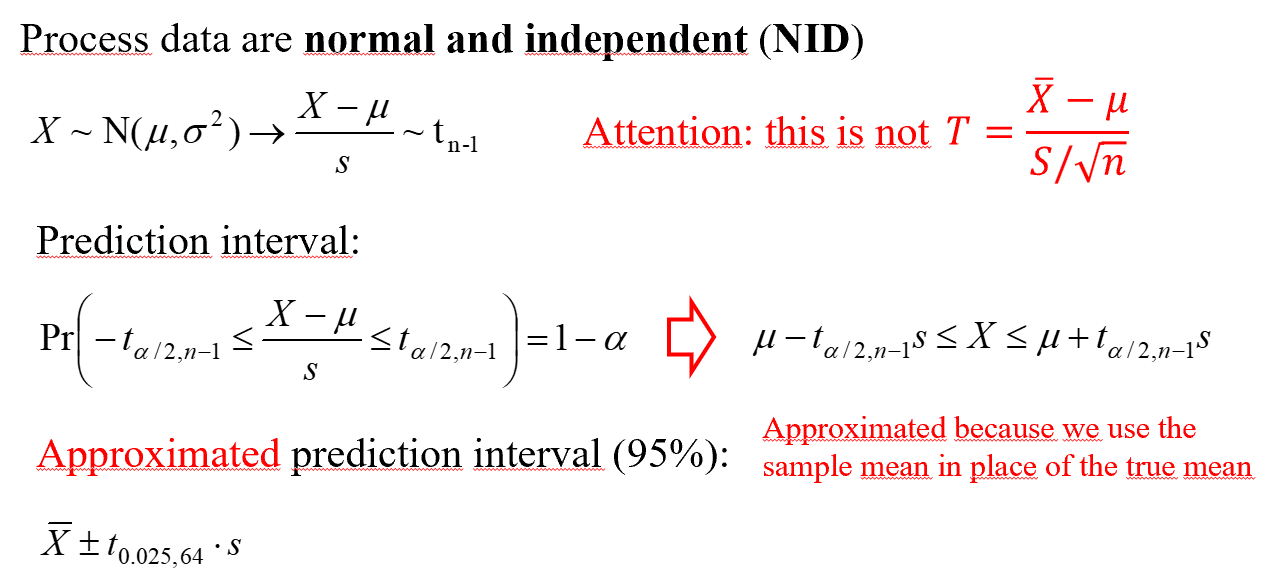

In [15]:
alpha = 0.05
df = len(data_norm) - 1
Xbar = data_norm.mean()
s = data_norm.std()
t_alpha = stats.t.ppf(1 - alpha/2, df)


[pred_lo, pred_up] = [Xbar-t_alpha*s,Xbar+t_alpha*s]
print('Two-sided confidence interval for transformed data: [%.3f %.3f]' % (pred_lo, pred_up))

Two-sided confidence interval for transformed data: [1.719 5.640]


**Attention**: this is the prediction interval on the transformed data.
To estimate the prediction interval on the **original data** we need to back transform.

Remind:
$y = (x^\lambda - 1) / \lambda $, for $\lambda \neq 0$

Thus:
$x = (y\lambda + 1)^{(1/\lambda)}$ 

In [16]:

[pred_lo_ORIG, pred_up_ORIG] = [(pred_lo*lmbda+1)**(1/lmbda),(pred_up*lmbda+1)**(1/lmbda)]
print('Two-sided confidence interval for original data: [%.3f %.3f]' % (pred_lo_ORIG, pred_up_ORIG))

Two-sided confidence interval for original data: [4.887 87.689]
